#### <font color='blue'> <h1 align="center"> PI : Data Mining Phase [Transaction Fraud Classification Model] <br> 4GL_2022/2023 <br> <font color='red'></font> </h1> </font>

# Import libraries and data

In [1]:
# Import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
import os

In [2]:
# Load Datasets
data1 = pd.read_csv('./Customer_DF.csv')
data2= pd.read_csv('./cust_transaction_details.csv')

# Data exploration
## Data dictionary:
### Our first dataset [Representing the customers] has 168 entries in function of 10 features which are:
    Unnamed= Index
    customerEmail= Customer Email Address 
    customerPhone= Customer Phone Number
    customerDevice= Customer Device Code
    customerIPAddress= Customer IP Address
    customerBillingAddress= Customer Billing Addres
    No_Transactions= Number of transactions
    No_Orders= Number of orders 
    No_Payments= Number of Payments
    Fraud= Target result
    
### Our second dataset [Representing the transactions] has 623 entries in function of 11 features which are:
    Unnamed= Index
    customerEmail= Customer Email Address
    transactionId= Transaction
    orderId= Order ID
    paymentMethodId= ID payment Method
    paymentMethodRegistrationFailure= Verification for the registration of the payment method
    paymentMethodType= Type of payment
    paymentMethodProvider= Provider
    transactionAmount= Amount
    transactionFailed= Transaction state 
    orderState= Order state

In [3]:
# Dataset size
data1.shape, data2.shape

((168, 10), (623, 11))

In [4]:
# Exploring non null values 1st dataset
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              168 non-null    int64 
 1   customerEmail           168 non-null    object
 2   customerPhone           168 non-null    object
 3   customerDevice          168 non-null    object
 4   customerIPAddress       168 non-null    object
 5   customerBillingAddress  168 non-null    object
 6   No_Transactions         168 non-null    int64 
 7   No_Orders               168 non-null    int64 
 8   No_Payments             168 non-null    int64 
 9   Fraud                   168 non-null    bool  
dtypes: bool(1), int64(4), object(5)
memory usage: 12.1+ KB


In [5]:
# Exploring non null values 2nd dataset
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Unnamed: 0                        623 non-null    int64 
 1   customerEmail                     623 non-null    object
 2   transactionId                     623 non-null    object
 3   orderId                           623 non-null    object
 4   paymentMethodId                   623 non-null    object
 5   paymentMethodRegistrationFailure  623 non-null    int64 
 6   paymentMethodType                 623 non-null    object
 7   paymentMethodProvider             623 non-null    object
 8   transactionAmount                 623 non-null    int64 
 9   transactionFailed                 623 non-null    int64 
 10  orderState                        623 non-null    object
dtypes: int64(4), object(7)
memory usage: 53.7+ KB


In [6]:
# Showing first five lines from first dataset
data1.head()

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
1,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
2,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False
3,3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False
4,4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True


In [7]:
# Showing first five lines from second dataset
data2.head()

,Unnamed: 0,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,1,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,3,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,4,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled


## Exploratory Data Analysis (EDA)

### Data Cleaning

In [8]:
data1.duplicated().any()

False

In [9]:
data2.duplicated().any()

False

### Check Missing Value

In [10]:
data1.isna().any()

Unnamed: 0                False
customerEmail             False
customerPhone             False
customerDevice            False
customerIPAddress         False
customerBillingAddress    False
No_Transactions           False
No_Orders                 False
No_Payments               False
Fraud                     False
dtype: bool

In [11]:
data2.isna().any()

Unnamed: 0                          False
customerEmail                       False
transactionId                       False
orderId                             False
paymentMethodId                     False
paymentMethodRegistrationFailure    False
paymentMethodType                   False
paymentMethodProvider               False
transactionAmount                   False
transactionFailed                   False
orderState                          False
dtype: bool

In [12]:
## See the difference email in data1 and data2
data1['customerEmail'].nunique() , data2['customerEmail'].nunique()

(161, 136)

## Data Visualization

### Which Payment Methods are most used??

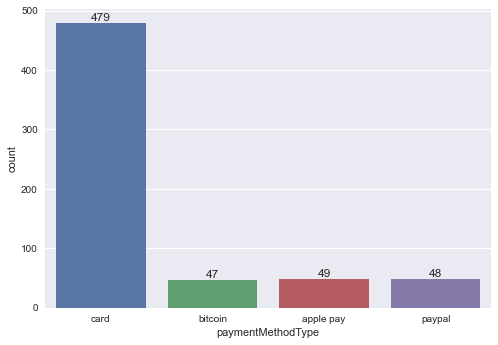

In [13]:
sns.countplot(x='paymentMethodType', data=data2)
ax = plt.gca()

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, ha='center', va='bottom')
plt.show()


### Result :
- Payment Method that the most use is card
- For other payment methods are relatively the same in use

### Which payment status appears most often??

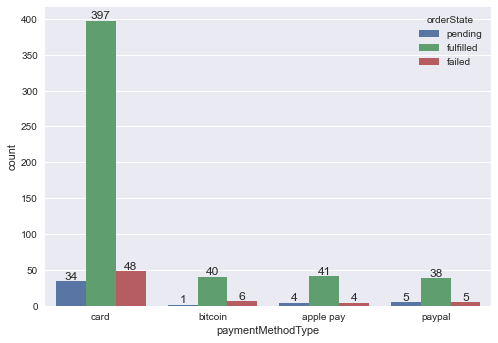

In [14]:
sns.countplot(x='paymentMethodType',hue='orderState',data = data2)
ax = plt.gca()

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, ha='center', va='bottom')
plt.show()

### Which payment providers the most 'failure' ???

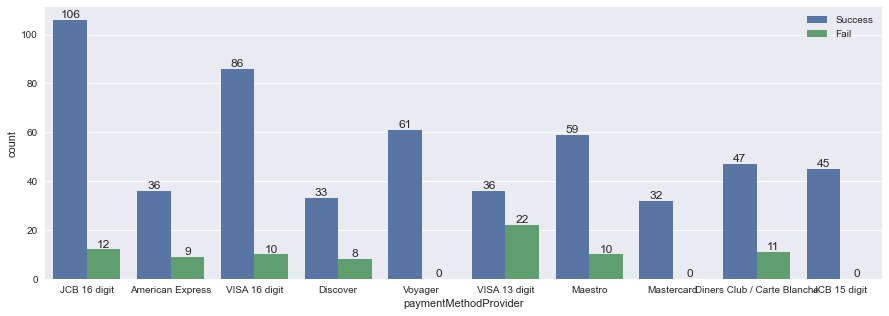

In [15]:
plt.figure(figsize=(15,5))
sns.countplot(x='paymentMethodProvider',hue = 'paymentMethodRegistrationFailure',data=data2)
plt.legend (['Success','Fail'])
ax = plt.gca()

# Iterate through the list of axes' patches
for p in ax.patches:
    height = np.nan_to_num(p.get_height(), 0)
    ax.text(p.get_x()+0.2, p.get_y() + height, '%d' % height, 
            fontsize=12, ha='center', va='bottom')
## tambahkan prameter angka
plt.show()

### Total number of payments per Fraud Transactions

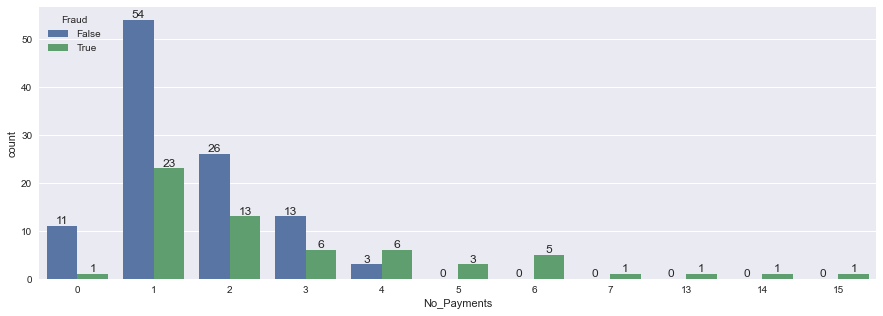

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'No_Payments',hue = 'Fraud',data=data1)
ax = plt.gca()

# Iterate through the list of axes' patches
for p in ax.patches:
    height = np.nan_to_num(p.get_height(), 0)
    ax.text(p.get_x()+0.2, p.get_y() + height, '%d' % height, 
            fontsize=12, ha='center', va='bottom')
## tambahkan prameter angka
plt.show()

### Result 
If the number of payements happened more than 4 times, it is a fraud

## Distribution of Transaction Amount

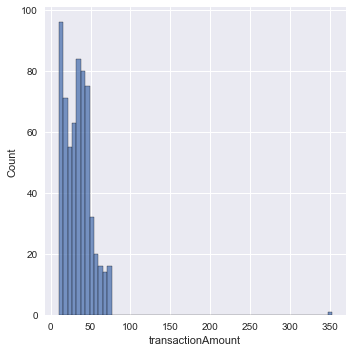

In [17]:
sns.displot(data2['transactionAmount'])

In [18]:
data2[data2['transactionAmount'] > 100]

,Unnamed: 0,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
189,189,uguzman@yahoo.com,ftiso5mr,32rax6,73a2hlmnm,0,card,VISA 16 digit,353,1,fulfilled


In [19]:
data1[data1['customerEmail']=='uguzman@yahoo.com']['Fraud']

55    True
Name: Fraud, dtype: bool

### Result
There is 1 transaction above 100 USD and also is Fraud

## Comparasion fraud & non fraud transactions

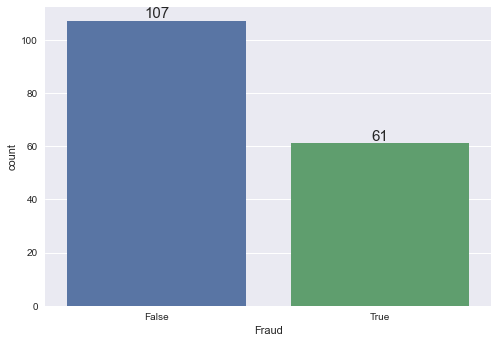

In [20]:
sns.countplot(x= 'Fraud',data=data1)
ax = plt.gca()

# Iterate through the list of axes' patches
for p in ax.patches:
    height = np.nan_to_num(p.get_height(), 0)
    ax.text(p.get_x()+0.4, p.get_y() + height, '%d' % height, 
            fontsize=15, ha='center', va='bottom')
plt.show()

## Feature Engineering

we join the data2 with the data1 because we want to see a pattern for fraud

In [21]:
final = data1[data1['customerEmail'].isin(data2['customerEmail'])== True].reset_index(drop=True)
final.shape

(143, 10)

In [22]:
final.head()

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
1,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
2,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False
3,3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False
4,4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True


we drop columns that have no effect

In [23]:
final.drop('Unnamed: 0',axis = 1, inplace = True)

In [24]:
# Total Failed transactions per customer
No_transactionsFail = []
for i in range(0,143):
    s=0
    for j in range(0,623):
        if(final['customerEmail'][i]==data2['customerEmail'][j]):
            s += data2['transactionFailed'][j]
    No_transactionsFail.append(s)
final['No_transactionsFail'] = No_transactionsFail

In [25]:
# Total Amount for all transactions per customer
Total_transaction_amt = []
for i in range(0,143):
    s=0
    for j in range(0,623):
        if(final['customerEmail'][i]==data2['customerEmail'][j]):
            s += data2['transactionAmount'][j]
    Total_transaction_amt.append(s)   
final['Total_transaction_amt'] = Total_transaction_amt

In [26]:
# Total number of payment method registrantion failure per customer
paymentRegFailure = []
for i in range(0,143):
    s=0
    for j in range(0,623):
        if(final['customerEmail'][i]==data2['customerEmail'][j]):
            s += data2['paymentMethodRegistrationFailure'][j]
    paymentRegFailure.append(s)   
final['PaymentRegFail'] = paymentRegFailure

In [27]:
# Encoding columns to convert from categorical to numerical
def col_make(column_name,category):
    array = []
    for i in range(0,143):
        s=0
        for j in range(0,623):
            if(final['customerEmail'][i]==data2['customerEmail'][j]):
                if data2[column_name][j]==category:
                    s+=1
        array.append(s)
    return array 

In [28]:
# Encoding Payment Methods to Paypal/Apple/Bitcoin/Card
PaypalPayments = col_make('paymentMethodType','paypal')
ApplePayments = col_make('paymentMethodType','apple pay')
BitcoinPayments = col_make('paymentMethodType','bitcoin')
CardPayments = col_make('paymentMethodType','card')

final['PaypalPayments']= PaypalPayments
final['ApplePayments']= ApplePayments
final['CardPayments']= CardPayments
final['BitcoinPayments']= BitcoinPayments

In [29]:
# Encoding Order State to fulfilled/failed/pending
OrdersFulfilled = col_make('orderState','fulfilled')
OrdersFailed =  col_make('orderState','failed')
OrdersPending = col_make('orderState','pending')

final['OrdersFulfilled'] = OrdersFulfilled
final['OrdersPending'] = OrdersPending
final['OrdersFailed'] = OrdersFailed

In [30]:
# Encoding Provider to JCB 16 digit / American Express / VISA 16 digit / Discover / Voyager / VISA 13 digit / Maestro / Mastercard / Carte Blanche / JCB 15 digit
JCB_16 = col_make('paymentMethodProvider','JCB 16 digit')
AmericanExp = col_make('paymentMethodProvider','American Express')
VISA_16 =  col_make('paymentMethodProvider','VISA 16 digit')
Discover =  col_make('paymentMethodProvider','Discover')
Voyager = col_make('paymentMethodProvider','Voyager')
VISA_13 = col_make('paymentMethodProvider','VISA 13 digit')
Maestro = col_make('paymentMethodProvider','Maestro')
Mastercard = col_make('paymentMethodProvider','Mastercard')
DC_CB =col_make('paymentMethodProvider','Diners Club / Carte Blanche')
JCB_15= col_make('paymentMethodProvider','JCB 15 digit')

final['JCB_16'] = JCB_16
final['AmericanExp'] = AmericanExp 
final['VISA_16'] = VISA_16 
final['Discover'] = Discover
final['Voyager'] = Voyager 
final['VISA_13'] = VISA_13
final['Maestro'] = Maestro 
final['Mastercard'] = Mastercard
final['DC_CB'] = DC_CB 
final['JCB_15'] = JCB_15

In [31]:
# Total number of failed orders
Trns_fail_order_fulfilled = []
for i in range(0,143):
    s=0
    for j in range(0,623):
        if(final['customerEmail'][i]==data2['customerEmail'][j]):
            if (data2['orderState'][j]=='fulfilled') & (data2['transactionFailed'][j]==1):
                s+=1
    Trns_fail_order_fulfilled.append(s)
final['Trns_fail_order_fulfilled'] = Trns_fail_order_fulfilled

In [32]:
final.head()

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,No_transactionsFail,...,AmericanExp,VISA_16,Discover,Voyager,VISA_13,Maestro,Mastercard,DC_CB,JCB_15,Trns_fail_order_fulfilled
0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,0,...,0,0,0,0,0,0,0,0,0,0
1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,1,...,2,1,0,0,0,0,0,0,0,1
2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False,2,...,0,0,1,0,0,0,0,0,0,2
3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False,0,...,0,0,0,3,0,0,0,0,0,0
4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True,2,...,1,2,0,0,1,0,0,0,0,2


In [33]:
# Check duplication for the IP address
Duplicate_IP = []
for i in range(0,143):
    s=0
    for j in range(0,143):
        if(final['customerIPAddress'][i]==final['customerIPAddress'][j]):
            s+=1
    s-=1        
    Duplicate_IP.append(s)
final['Duplicate_IP'] = Duplicate_IP

In [34]:
# Check duplication for the billing address
Duplicate_Address = []
for i in range(0,143):
    s=0
    for j in range(0,143):
        if(final['customerBillingAddress'][i]==final['customerBillingAddress'][j]):
            s+=1
    s-=1        
    Duplicate_Address.append(s)
final['Duplicate_Address']=Duplicate_Address

In [35]:
# Encoding target feature
final = pd.get_dummies(final,columns=['Fraud'],prefix=['Fraud'],drop_first=True)
final = final.rename(columns={"Fraud_True": "Fraud"})
final.head()

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,No_transactionsFail,Total_transaction_amt,...,Voyager,VISA_13,Maestro,Mastercard,DC_CB,JCB_15,Trns_fail_order_fulfilled,Duplicate_IP,Duplicate_Address,Fraud
0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,0,44,...,0,0,0,0,0,0,0,0,0,0
1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,1,111,...,0,0,0,0,0,0,1,0,0,1
2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,2,131,...,0,0,0,0,0,0,2,0,0,0
3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,0,85,...,3,0,0,0,0,0,0,0,0,0
4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,2,411,...,0,1,0,0,0,0,2,0,0,1


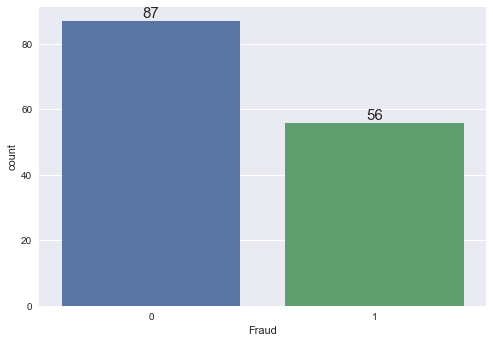

In [36]:
sns.countplot(x= 'Fraud',data=final)
ax = plt.gca()

# Iterate through the list of axes' patches
for p in ax.patches:
    height = np.nan_to_num(p.get_height(), 0)
    ax.text(p.get_x()+0.4, p.get_y() + height, '%d' % height, 
            fontsize=15, ha='center', va='bottom')
plt.show()

In [37]:
final[final['Duplicate_IP']>0]

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,No_transactionsFail,Total_transaction_amt,...,Voyager,VISA_13,Maestro,Mastercard,DC_CB,JCB_15,Trns_fail_order_fulfilled,Duplicate_IP,Duplicate_Address,Fraud
39,jamescampbell@randall-pacheco.biz,599-142-6783,eaul63h9guyvwuymfn3z,45.203.99.249,"29408 Lisa Lock\nPort Jennifer, LA 26501-7040",7,3,2,4,146,...,0,2,0,0,0,0,4,3,0,1
67,warrenedward@arnold.com,201.737.5119x64000,6py7ewqjkxjw8zjl9eri,45.203.99.249,49680 Brian Squares Apt. 122\nPort Walterburgh...,4,4,14,0,117,...,1,1,0,0,0,0,0,3,2,1
73,shelby24@hotmail.com,(071)934-3315x27613,obb41ux0zfa2td5ajo9s,45.203.99.249,"3271 Cynthia Groves\nPort Jeremyberg, CO 27305",5,4,2,1,192,...,0,0,0,2,3,0,0,3,0,1
118,christinemills@mcgee.com,(651)355-4709,zbn9it3s7yl69bjtrnqf,45.203.99.249,"5156 Greene Park Apt. 748\nNew Sandra, CA 1480...",5,5,2,0,125,...,5,0,0,0,0,0,0,3,0,1


There are 4 customers who have the same "IP Address" and it is impossible for one device to have the same IP address, so it has to be fraudulent.

In [38]:
final[final['Duplicate_Address']>0]

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,No_transactionsFail,Total_transaction_amt,...,Voyager,VISA_13,Maestro,Mastercard,DC_CB,JCB_15,Trns_fail_order_fulfilled,Duplicate_IP,Duplicate_Address,Fraud
47,feliciabrown@gmail.com,(226)129-2677,z7xkuohhjbtiqs6q9rk9,115.137.171.103,49680 Brian Squares Apt. 122\nPort Walterburgh...,1,1,1,0,41,...,0,0,0,0,0,0,0,0,2,1
67,warrenedward@arnold.com,201.737.5119x64000,6py7ewqjkxjw8zjl9eri,45.203.99.249,49680 Brian Squares Apt. 122\nPort Walterburgh...,4,4,14,0,117,...,1,1,0,0,0,0,0,3,2,1
75,brittanydean@hotmail.com,06238721842,yq8xiivmx4prlgx0gofo,3517:8e52:885:8640:a59:f5fd:cb33:b06a,49680 Brian Squares Apt. 122\nPort Walterburgh...,6,4,1,2,202,...,6,0,0,0,0,0,2,0,2,1


There are 3 transactions from different customers but have the same customerBillingAddress, can be done by the same customer

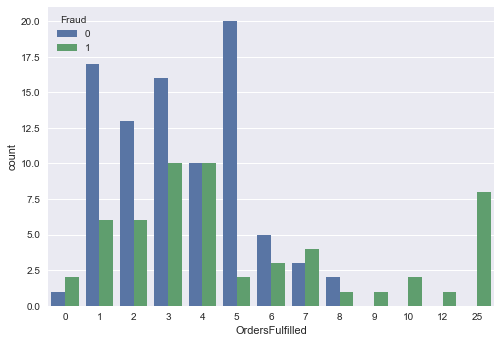

In [39]:
sns.countplot(x = final['OrdersFulfilled'], hue = final['Fraud'])
plt.show()

we can see that if the Fulfilled Order Amount is greater than 8 then the transaction is has to be "Fraud"

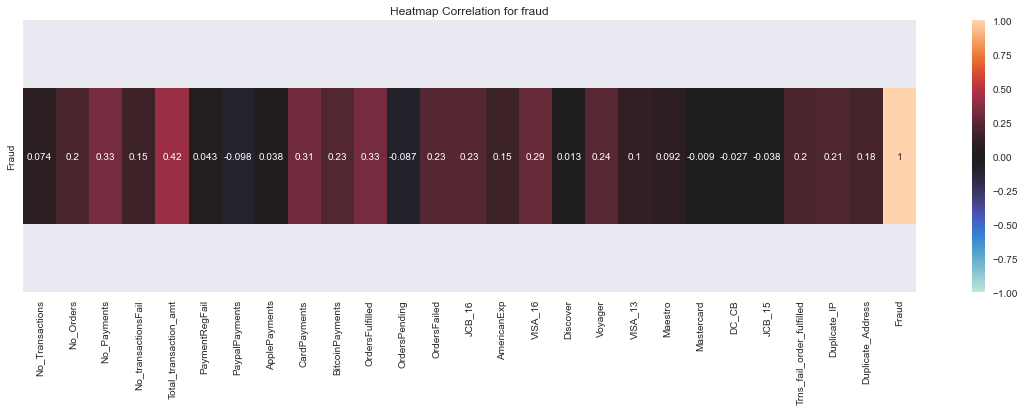

In [40]:
corr = final.corr()
corr2 = corr.iloc[-1:,:]

plt.figure(figsize=(20, 5))
ax = sns.heatmap(corr2, annot=True, vmin=-1, vmax=1, center=0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Heatmap Correlation for fraud')
plt.show()

The correlation formed between fraud and other variables tends to be not strong, because the data is too little

### Create variable target

In [41]:
x = final.drop(['customerEmail','customerPhone', 'customerDevice', 'customerIPAddress',
       'customerBillingAddress','Fraud'], axis=1)
y = final['Fraud']

## Split, Train, Test Data

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [44]:
x_train.shape

(114, 26)

In [45]:
x_test.shape

(29, 26)

## Machine Learning

In [46]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

## KNN

In [47]:
test_error_rate=[]
for k in range(1,30):
    knn_midel=KNeighborsClassifier(n_neighbors=k)
    knn_midel.fit(x_train,y_train)
    y_p_test=knn_midel.predict(x_test)
    test_error=1-accuracy_score(y_test,y_p_test)
    test_error_rate.append(test_error)

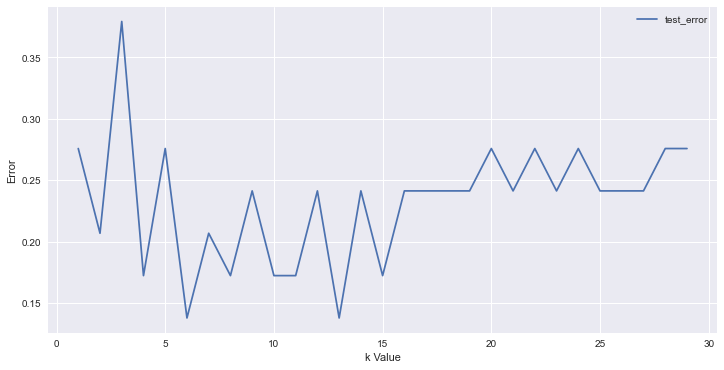

In [48]:
plt.figure(figsize=(12,6))
plt.plot(range(1,30),test_error_rate,label='test_error')
plt.legend()
plt.xlabel('k Value')
plt.ylabel('Error')
plt.show()

In [49]:
knn_model = KNeighborsClassifier(n_neighbors = 13)
knn_model = knn_model.fit(x_train,y_train)

In [50]:
y_pred_knn = knn_model.predict(x_test)

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        18
           1       1.00      0.64      0.78        11

    accuracy                           0.86        29
   macro avg       0.91      0.82      0.84        29
weighted avg       0.89      0.86      0.85        29



<AxesSubplot:>

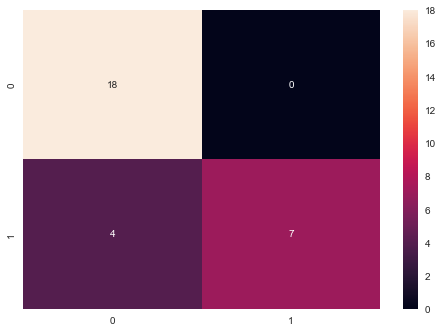

In [51]:
print(classification_report(y_test, y_pred_knn))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot = True)

## SVM

In [52]:
svc = SVC()
svc = svc.fit(x_train, y_train)
y_pred_svc = svc.predict(x_test)

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        18
           1       1.00      0.55      0.71        11

    accuracy                           0.83        29
   macro avg       0.89      0.77      0.79        29
weighted avg       0.87      0.83      0.81        29



<AxesSubplot:>

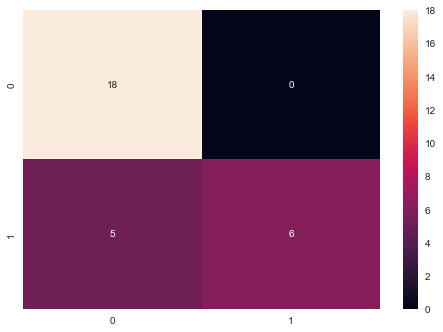

In [53]:
print(classification_report(y_test, y_pred_svc))
sns.heatmap(confusion_matrix(y_test, y_pred_svc), annot = True)

In [54]:
accuracy, precision, recall, roc = [],[],[],[]
predictions = [y_pred_knn,y_pred_svc]

               
for i in range (len(predictions)):
    accuracy.append(accuracy_score(y_test, predictions[i]))
    precision.append(precision_score(y_test, predictions[i]))
    recall.append(recall_score(y_test, predictions[i]))
    roc.append(roc_auc_score(y_test, predictions[i]))

compare = pd.DataFrame ({'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'ROC_score':roc}, index=["knn","svm"])
compare.sort_values('Accuracy', ascending=False)

,Accuracy,Precision,Recall,ROC_score
knn,0.862069,1.0,0.636364,0.818182
svm,0.827586,1.0,0.545455,0.772727


In [55]:
model_params = {
     'svm': {
        'model': SVC(),
        'params' : {
            'C' : [1.0, 2.0, 4.0, 6.0, 8.0, 10.0],
            'kernel': ['rbf'],
            'gamma' : ['scale', 'auto']
        }  
    },
    'knn': {
        'model' : KNeighborsClassifier(),
        'params' : {
            'n_neighbors' : [i for i in range(1,50,1)],
            'weights' : ['uniform', 'distance'],
            'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'n_jobs' : [-1]   
        }  
    }
}

## GridSearchCV

In [56]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
data = pd.DataFrame(scores,columns=['model','best_score','best_params'])
data

,model,best_score,best_params
0,svm,0.710672,"{'C': 10.0, 'gamma': 'scale', 'kernel': 'rbf'}"
1,knn,0.718972,"{'algorithm': 'auto', 'n_jobs': -1, 'n_neighbo..."


## RandomizedSearchCV

In [57]:
scores = []

for model_name, mp in model_params.items():
    clf_random =  RandomizedSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf_random.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf_random.best_score_,
        'best_params': clf_random.best_params_
    })
    
data1 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
data1

,model,best_score,best_params
0,svm,0.710672,"{'kernel': 'rbf', 'gamma': 'scale', 'C': 10.0}"
1,knn,0.692490,"{'weights': 'distance', 'n_neighbors': 45, 'n_..."


In [58]:
data['best_params'][0]

{'C': 10.0, 'gamma': 'scale', 'kernel': 'rbf'}

In [59]:
model = SVC(C=10.0,gamma='scale',kernel='rbf')

In [60]:
model.fit(x_train, y_train)

SVC(C=10.0)

In [61]:
# Predict the values for the test split
y_pred = model.predict(x_test)

In [62]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0], dtype=uint8)

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        18
           1       1.00      0.55      0.71        11

    accuracy                           0.83        29
   macro avg       0.89      0.77      0.79        29
weighted avg       0.87      0.83      0.81        29



<AxesSubplot:>

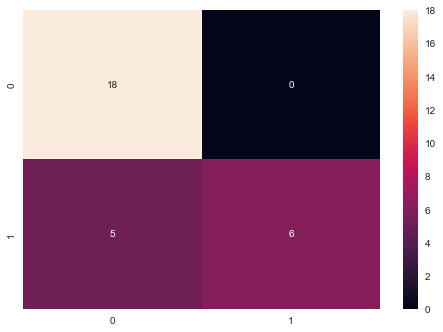

In [63]:
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)

> Fraud was totally detected: each farud situation was flagged as fraud. Howerver, some true lines were flagged as fraud (5).